In [2]:
import os
import zipfile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
local_zip = '/content/drive/MyDrive/scalp_image_model.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [5]:
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
base_dir = '/content'

test_dir = os.path.join(base_dir,'test')

In [7]:
test_bd_test_dir = os.path.join(test_dir,'bd_test')

In [8]:
test_bd_dir = os.path.join(test_bd_test_dir,'zbd')

In [9]:
test_fnames=os.listdir(test_bd_dir)

In [10]:
test_fnames

['0131_A2LEBJJDE00166C_1604904632748_3_TH.jpg',
 '0131_A2LEBJJDE00166C_1604650494960_2_TH.jpg',
 '0131_A2LEBJJDE00166C_1604904527402_3_TH.jpg',
 '0131_A2LEBJJDE00166C_1604905574344_3_TH.jpg',
 '0131_A2LEBJJDE00166C_1604282955299_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1606386486884_5_RH.jpg',
 '0013_A2LEBJJDE00060O_1606550851385_6_BH.jpg',
 '0131_A2LEBJJDE00166C_1604637373578_5_RH.jpg',
 '0013_A2LEBJJDE00060O_1604563696918_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1604540030816_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1606550726665_4_LH.jpg',
 '0013_A2LEBJJDE00060O_1603508849507_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1604540063228_6_BH.jpg',
 '0131_A2LEBJJDE00166C_1604904632748_6_BH.jpg',
 '0131_A2LEBJJDE00166C_1604892468341_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1606551062717_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1606386266117_3_TH.jpg',
 '0131_A2LEBJJDE00166C_1604904527402_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605242422804_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.jpg',
 '0131_A2LEBJJDE00166C_1604626406215_4_L

In [11]:
batch_size = 32
epochs = 20
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
test_gen = test_datagen.flow_from_directory(batch_size=batch_size,
                                          directory=test_bd_test_dir,
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 64 images belonging to 2 classes.


In [14]:
sample_test_images, _ = next(test_gen)

In [15]:
sample_test_images.shape

(32, 128, 128, 3)

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

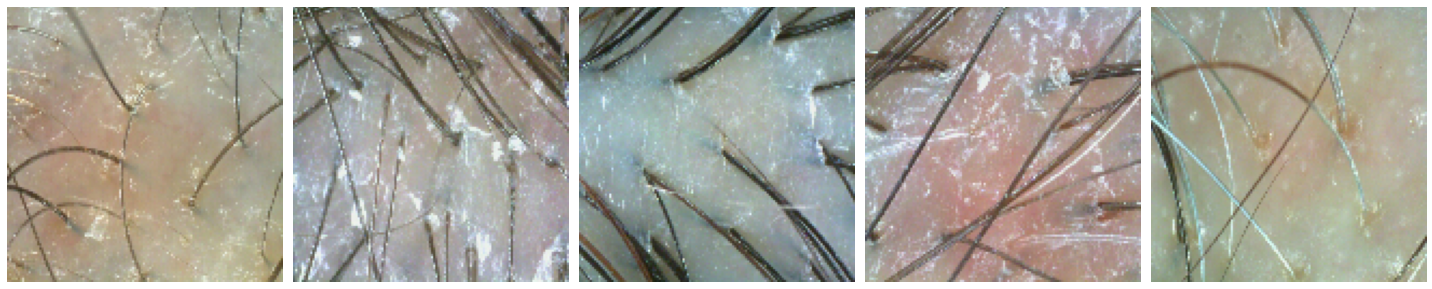

In [17]:
import matplotlib.pyplot as plt
plotImages(sample_test_images[:5])

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
bd_model = keras.models.load_model('/content/drive/MyDrive/두피모델/202111_my_bd_CNN_model.h5')
hb_model = keras.models.load_model('/content/drive/MyDrive/두피모델/202111_my_hb_CNN_model.h5')
pj_model = keras.models.load_model('/content/drive/MyDrive/두피모델/202111_my_pj_CNN_model.h5')
tm_model = keras.models.load_model('/content/drive/MyDrive/두피모델/202111_my_tm_CNN_model.h5')
gj_model = keras.models.load_model('/content/drive/MyDrive/두피모델/202111_my_gj_CNN_model.h5')

In [25]:
#비듬
bd = round(bd_model.predict(sample_test_images[3].reshape(1,128,128,3))[0][0],4)
bd_p = round(bd*100,2)
print(str(bd_p) + '%')

59.72%


In [26]:
#홍반
hb = round(hb_model.predict(sample_test_images[3].reshape(1,128,128,3))[0][0],4)
hb_p = round(hb*100,2)
print(str(hb_p) + '%')

47.27%


In [27]:
#피지
pj = round(pj_model.predict(sample_test_images[3].reshape(1,128,128,3))[0][0],4)
pj_p = round(pj*100,2)
print(str(pj_p) + '%')

49.66%


In [30]:
#탈모
tm = round(tm_model.predict(sample_test_images[1].reshape(1,128,128,3))[0][0],4)
tm_p = round(tm*100,2)
print(str(tm_p) + '%')

46.15%


In [31]:
#각질
gj = round(gj_model.predict(sample_test_images[1].reshape(1,128,128,3))[0][0],4)
gj_p = round(gj*100,2)
print(str(gj_p) + '%')

42.29%
